In [1]:
import joblib
import colorcet as cc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from aging.plotting import format_plots, format_pizza_plots, PlotConfig, save_factory, figure

import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap, BoundaryNorm, Normalize, LogNorm

In [2]:
c = PlotConfig()
format_plots()
# format_pizza_plots()
saver = save_factory(c.save_path / "beh-individualization", tight_layout=False)
# saver = save_factory(c.save_path / "black-bg", tight_layout=False, backgrounds=('black',))

In [3]:
version = 7  # arhmm version
data = joblib.load(f"/n/groups/datta/win/longtogeny/data/ontogeny/version_{version:02d}/misc/embedding.p")

In [4]:
mice = np.unique(data['mouse'])

In [10]:
cmaps = {k: sns.blend_palette(["#333", cc.glasbey_light[k]], as_cmap=True) for k in mice}
# cmaps = {k: sns.blend_palette(["#ddd", cc.glasbey_light[k]], as_cmap=True) for k in mice}

cmap_list = [(x / (len(mice) - 1), cc.glasbey_light[y]) for x, y in enumerate(mice)]
segmented = LinearSegmentedColormap.from_list("segmented", cmap_list)

norm = BoundaryNorm(np.arange(len(mice) + 1) / (len(mice) + 1), segmented.N)

cont = plt.get_cmap("bone")
# cont = sns.blend_palette(['#ddd', '#222'], as_cmap=True)
cont_norm = LogNorm(vmin=data['age'].min(), vmax=data['age'].max())
# cont_norm = Normalize(vmin=data["age"].min(), vmax=data["age"].max())

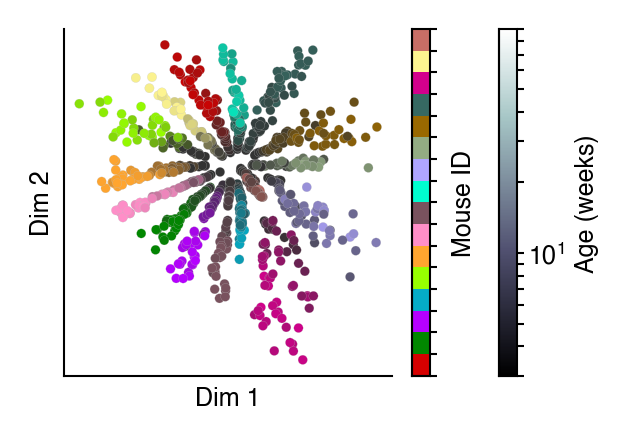

In [11]:
fig = figure(2.2, 1.5)
ax = fig.gca()
for k, v in cmaps.items():
    mask = data["mouse"] == k
    d = data["emb"][mask]
    c = data["age"][mask]
    ax.scatter(*d.T, c=c, cmap=cmaps[k], s=5, vmax=data['age'].max(), norm='log',edgecolors='silver',linewidths=0.05,)
ax.set(xticks=[], yticks=[], xlabel="Dim 1", ylabel="Dim 2")
cb2 = fig.colorbar(mpl.cm.ScalarMappable(norm=cont_norm, cmap=cont), ax=ax, label="Age (weeks)")
cb2.set_ticks([10, 20, 30, 40, 50, 60, 70, 80, 90])
cb1 = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=segmented), ax=ax, label="Mouse ID")
cb1.set_ticks([])
sns.despine()
saver(fig, "guided-ae-embedding");
# saver(fig, "guided-ae-embedding-bw");

In [ ]:
def plot_embedding(cb: "PlottingCallback", index):
    emb = cb.points[index].T
    fig = plt.figure(figsize=(1.5, 1.5))
    ax = fig.gca()
    enc = LabelEncoder().fit_transform(cb.data.index.get_level_values("mouse"))
    mice = np.unique(enc)
    age = cb.data.index.get_level_values("pseudo_age").to_numpy()
    cmaps = {k: sns.blend_palette(["#333", cc.glasbey[k]], as_cmap=True) for k in mice}
    for k, v in cmaps.items():
        mask = enc == k
        ax.scatter(*emb[:, mask], c=age[mask], cmap=v, s=5, linewidths=0.05, edgecolors='silver', norm='log')
        # ax.scatter(*emb[:, mask], c=age[mask], cmap=v, s=4, norm="log")
    min_x, min_y = np.min(emb, axis=1)
    max_x, max_y = np.max(emb, axis=1)
    y_range = (max_y - min_y) * 0.02
    x_range = (max_x - min_x) * 0.02
    ax.set(
        xlim=(min_x - x_range, max_x + x_range),
        ylim=(min_y - y_range, max_y + x_range),
        xticks=[],
        yticks=[],
    )
    sns.despine(left=True, bottom=True)
    return fig

In [ ]:
fig = plot_embedding(cb, -1)